In [1]:
import os.path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
print(os.path.exists("C:/Users/maxim/Chess/data/games.csv"))

True


In [4]:
ds = pd.read_csv("C:/Users/maxim/Chess/data/games.csv")

In [5]:
print('columns count - ',len(ds.columns), '\n')
print('columns: ',list(ds.columns))

columns count -  16 

columns:  ['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status', 'winner', 'increment_code', 'white_id', 'white_rating', 'black_id', 'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply']


In [6]:
print('Samples count: ',ds.shape[0])

Samples count:  20058


In [7]:
display(ds.head(2))

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4


In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [9]:
print("Any missing sample in training set:",ds.isnull().values.any())

Any missing sample in training set: False


In [10]:
ds.nunique()

id                19113
rated                 2
created_at        13151
last_move_at      13186
turns               211
victory_status        4
winner                3
increment_code      400
white_id           9438
white_rating       1516
black_id           9331
black_rating       1521
moves             18920
opening_eco         365
opening_name       1477
opening_ply          23
dtype: int64

In [11]:
white=ds[ds['winner']=='white']
black= ds[ds['winner']=='black']
draw= ds[ds['winner']=='draw']
white=ds[ds['winner']=='white'].shape[0]
black= ds[ds['winner']=='black'].shape[0]
draw= ds[ds['winner']=='draw'].shape[0]

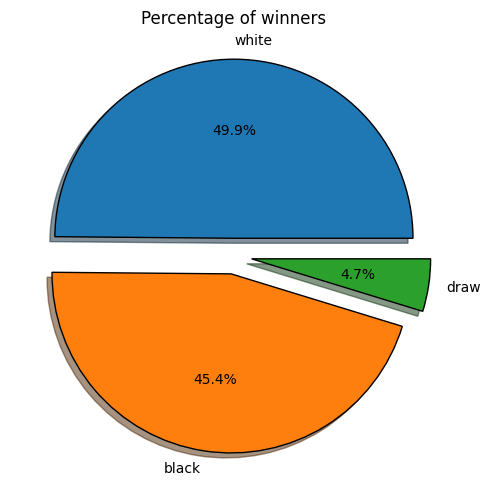

In [12]:
plt.rcParams["figure.figsize"] = (7,5)
slices=[white,black,draw]
labels=['white','black','draw']
explode=[0.1,0.1,0.1]
plt.pie(slices,labels=labels,explode=explode,wedgeprops={'edgecolor':'black'},shadow=True,autopct='%1.1f%%')
plt.title("Percentage of winners")
plt.tight_layout()
plt.show()

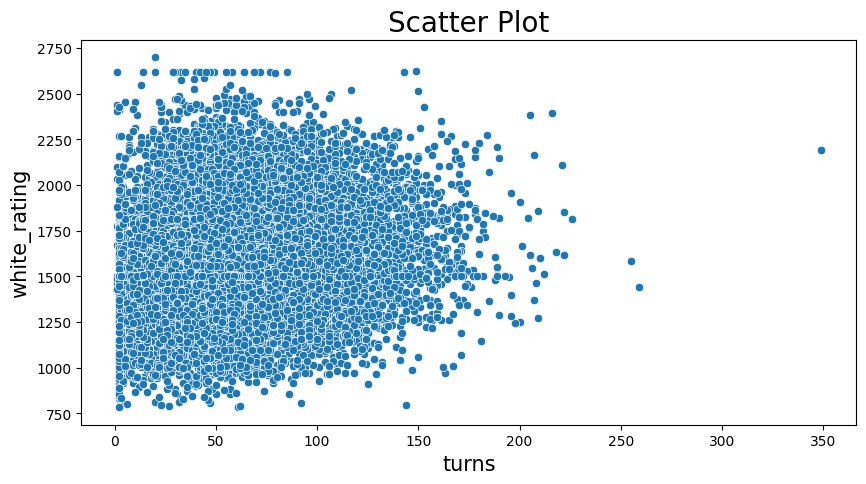

In [13]:
plt.rcParams["figure.figsize"] = (10,5)
sns.scatterplot(x=ds["turns"],y=ds["white_rating"],palette = "dark")
plt.title("Scatter Plot",fontsize=20)
plt.xlabel("turns",fontsize=15)
plt.ylabel("white_rating",fontsize=15)
plt.show()

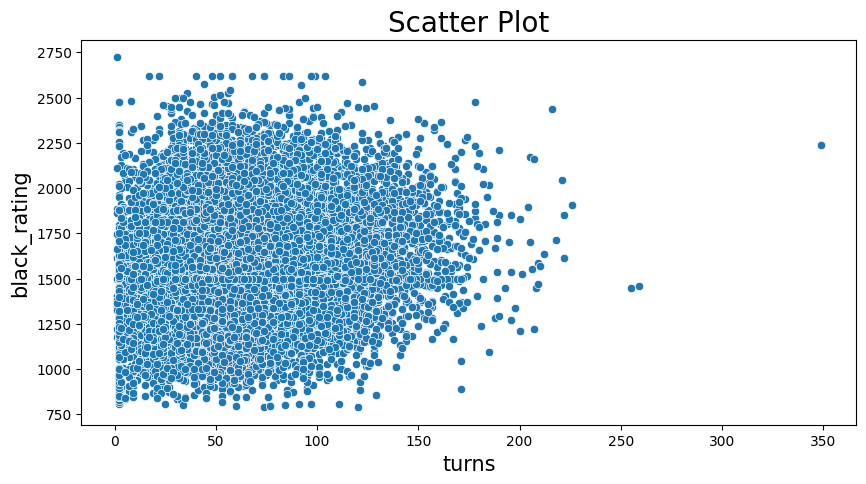

In [14]:
plt.rcParams["figure.figsize"] = (10,5)
sns.scatterplot(x=ds["turns"],y=ds["black_rating"],palette = "dark")
plt.title("Scatter Plot",fontsize=20)
plt.xlabel("turns",fontsize=15)
plt.ylabel("black_rating",fontsize=15)
plt.show()

<Axes: >

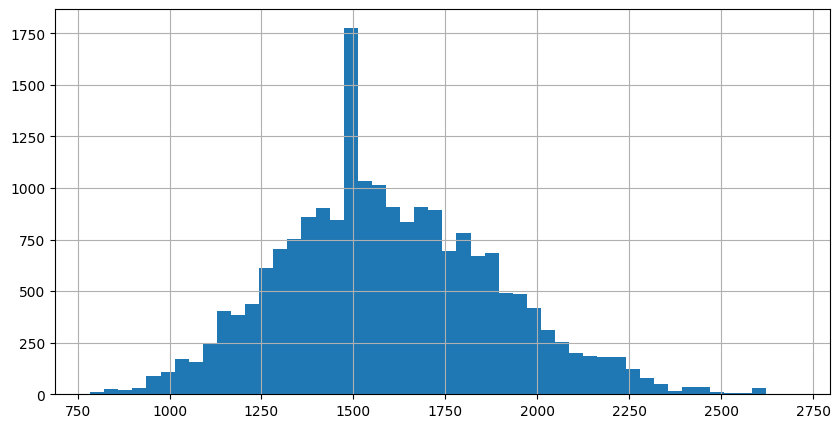

In [15]:
ds[ds['white_rating']<3500]['white_rating'].hist(bins=50)

<Axes: >

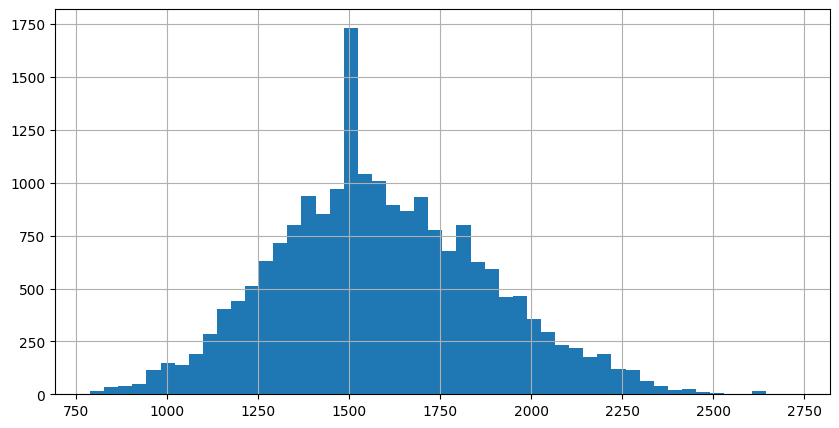

In [16]:
ds[ds['black_rating']<3500]['black_rating'].hist(bins=50)

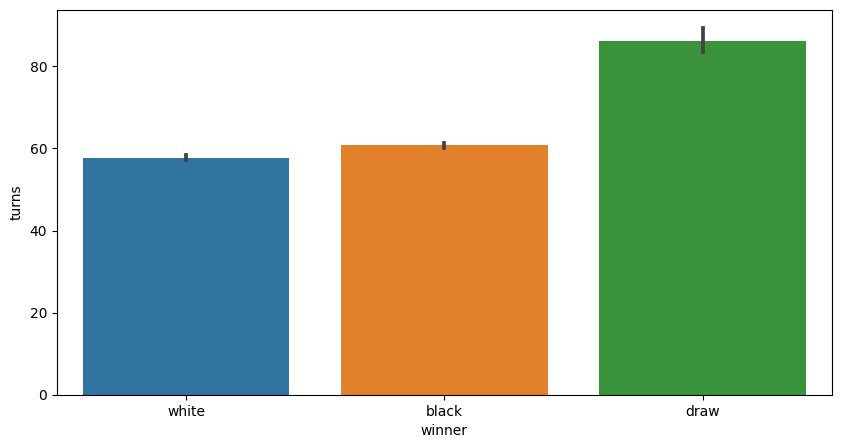

In [17]:
plt.rcParams["figure.figsize"] = (10,5)
graph = ds[["winner", "turns"]]
ax = sns.barplot(x="winner", y="turns", data=graph)

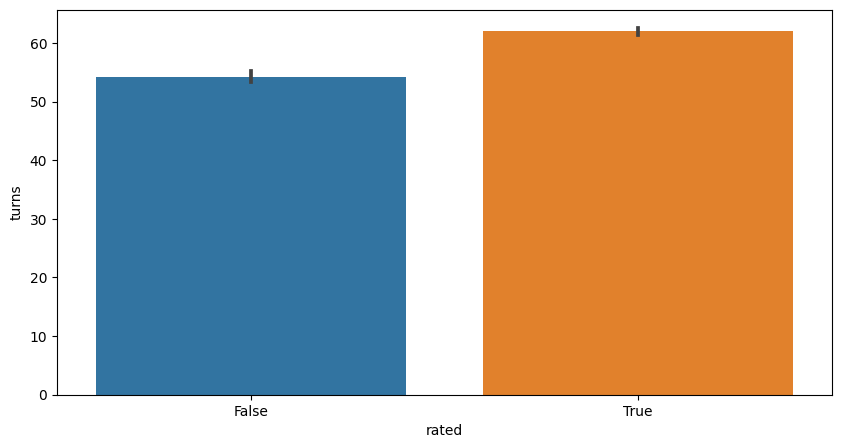

In [18]:
plt.rcParams["figure.figsize"] = (10,5)
graph = ds[["rated", "turns"]]
ax = sns.barplot(x="rated", y="turns", data=graph)

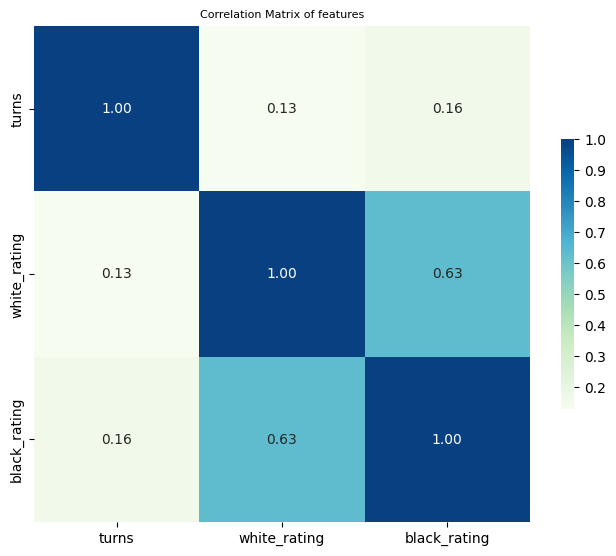

In [19]:
col_for_corr = ['turns', 
                'white_rating', 'black_rating']
plt.rcParams["figure.figsize"] = (8,7)
correlation_matrix = ds[col_for_corr].corr()
sns.heatmap(
    correlation_matrix,
    vmax=1,
    square=True,
    annot=True,
    fmt='.2f',
    cmap='GnBu',
    cbar_kws={"shrink": .5},
    robust=True)
plt.title('Correlation Matrix of features', fontsize=8)
plt.show()